In [4]:
import torch
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

#**Using pretrained Faster RCNN Without Finetuning**

In [5]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 140MB/s]


In [6]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [46]:
ig = Image.open("/content/traffic.jpg")

In [47]:
transform = T.ToTensor()
img = transform(ig)

In [48]:
with torch.no_grad():
  prediction = model([img])

In [49]:
prediction

[{'boxes': tensor([[1313.7159,  502.6574, 1510.4939,  649.4661],
          [ 296.3575,  792.8600,  399.6053,  948.5010],
          [1160.1553,  571.6005, 1346.0239,  713.1856],
          [1425.6603,  698.8146, 1533.5869,  843.8062],
          [ 111.9070,  309.5265,  147.9955,  346.1106],
          [ 649.1636,  777.3093,  752.5406,  941.7277],
          [ 497.3315,  674.6334,  577.2480,  820.0779],
          [ 956.4317,  669.0206, 1165.8645,  862.5724],
          [ 558.2091,  287.4584,  584.8122,  372.5230],
          [ 843.2516,  507.2991,  967.1937,  615.2287],
          [1385.6121,  429.6832, 1441.8268,  503.2541],
          [ 175.1129,  757.4023,  271.1615,  948.1848],
          [   0.0000,  520.6008,   69.3044,  640.3528],
          [1010.5500,  749.3452, 1097.8856,  850.2156],
          [1417.5024,  758.9366, 1554.2850,  865.8864],
          [  89.9156,  318.6975,  112.5330,  345.7524],
          [ 229.9589,  613.6541,  321.4483,  781.9899],
          [ 998.1680,  496.7467, 1058.0

In [50]:
prediction[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [51]:
bboxes, labels, scores = prediction[0]['boxes'], prediction[0]['labels'], prediction[0]['scores']

In [61]:
num = torch.argwhere(scores > 0.8).shape[0]

In [62]:
num

57

In [54]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [58]:
igg = cv2.imread("/content/traffic.jpg")

In [63]:
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
  class_name = coco_names[labels.numpy()[i]-1]
  cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 1)
  cv2.putText(igg, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

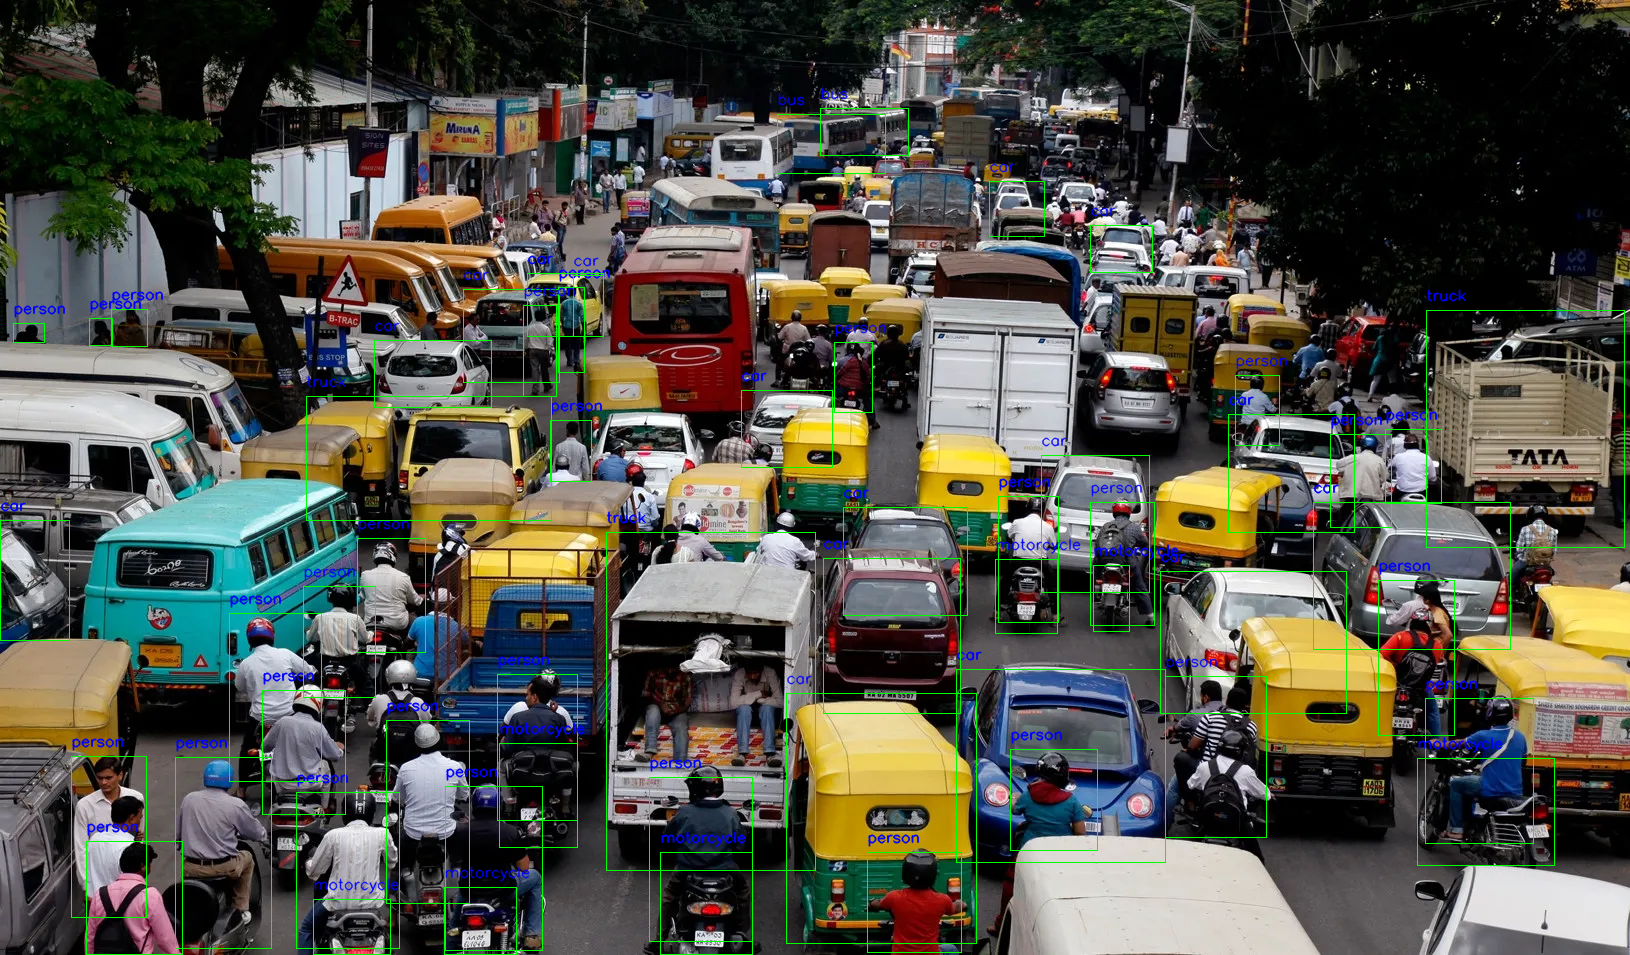

In [64]:
cv2_imshow(igg)